# Machine Learning Lab-04: Experiment 3 - Logistic Regression

## Objective
Perform Logistic Regression using the 'Ad Click Prediction' dataset to predict whether a user will click on an ad based on features like daily time spent on site, age, area income, etc.

## Theory
Logistic Regression is a statistical method used for binary classification problems. Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts the probability of an event occurring (e.g., Click or No Click). The output is transformed using the sigmoid function to map values between 0 and 1.

Sigmoid Function: $P(Y=1) = \frac{1}{1 + e^{-z}}$
Where $z = b_0 + b_1x_1 + ... + b_nx_n$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')

### 1. Load and Inspect Dataset

In [2]:
# Load the dataset
df = pd.read_csv('ad_click_prediction.csv')

# Display first 5 rows
print(df.head())

# Check dataset info
print(df.info())

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

### 2. Data Visualization

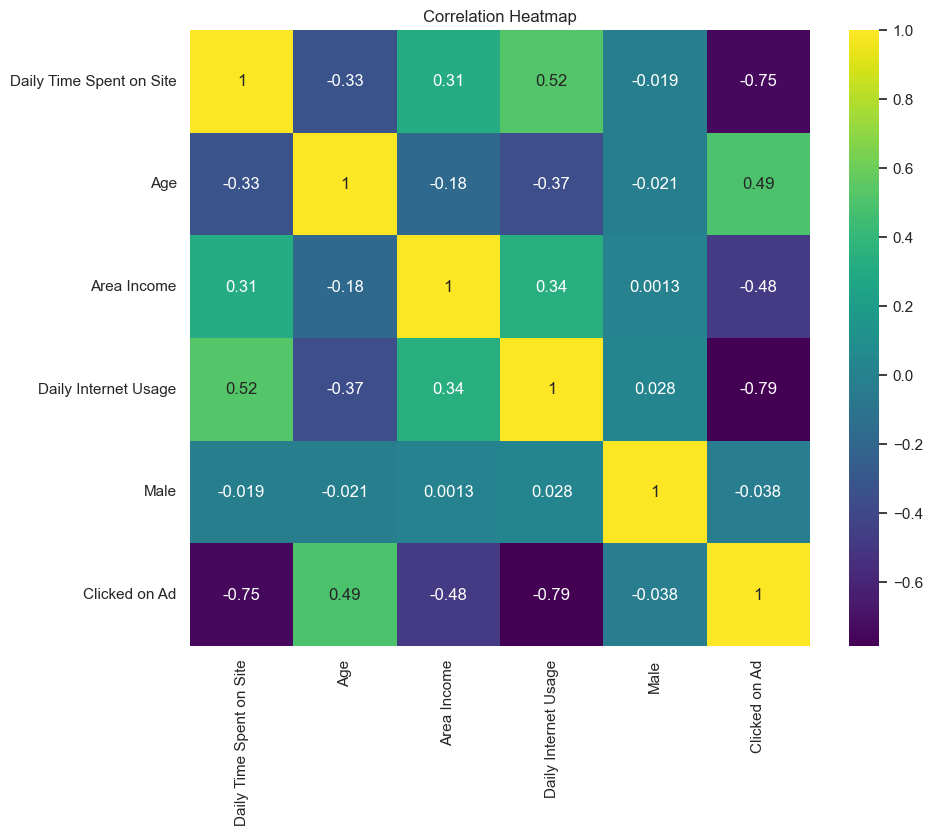

In [3]:
# Visualize correlation heatmap (Numeric columns only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

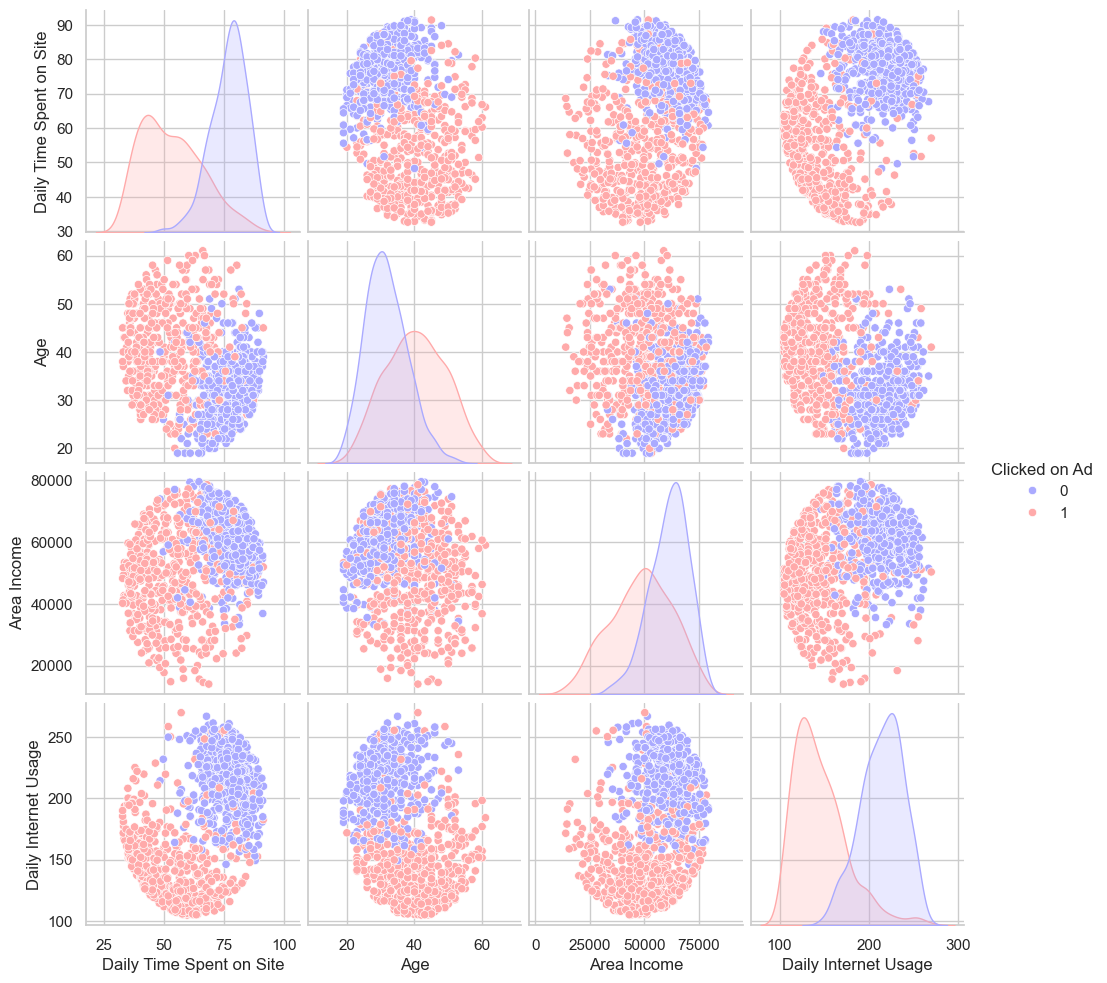

In [4]:
# Pairplot categorized by 'Clicked on Ad' (Numeric columns only)
numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']
sns.pairplot(df[numerical_cols], hue='Clicked on Ad', palette='bwr')
plt.show()

### 3. Data Preprocessing

In [5]:
# Select relevant numerical features for training
# Dropping 'Ad Topic Line', 'City', 'Country', 'Timestamp' for simplicity
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 700
Testing set size: 300


### 4. Model Training

In [6]:
# Initialize and train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 5. Prediction and Evaluation

Confusion Matrix:
[[142   4]
 [  6 148]]


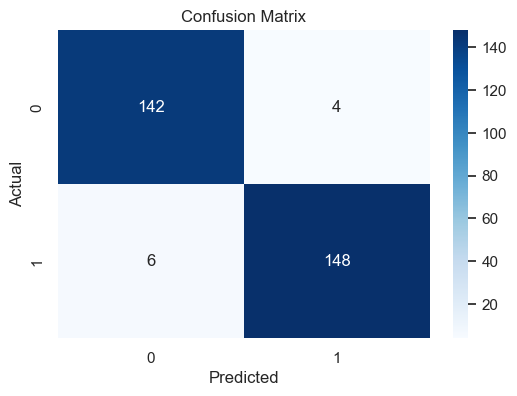

In [7]:
# Make predictions
y_pred = log_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [8]:
# Accuracy Score
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy Score: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       146
           1       0.97      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## Conclusion
The Logistic Regression model was successfully implemented to predict ad clicks. The confusion matrix and classification report indicate the model's performance in distinguishing between users who clicked the ad and those who did not. Features like 'Daily Time Spent on Site' and 'Daily Internet Usage' likely played a significant role in prediction.